In [1]:

import geopandas as gp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from geodatasets import get_path
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
print(world)
world.head()

C:\Users\mcant\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
C:\Users\mcant\AppData\Local\Temp\ipykernel_30916\593100115.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
cities = gp.read_file(gp.datasets.get_path("naturalearth_cities"))
cities.head()

C:\Users\mcant\AppData\Local\Temp\ipykernel_2464\2260394496.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gp.read_file(gp.datasets.get_path("naturalearth_cities"))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [ ]:

#This is geospatial data stored into a geodataframe

Text(0.5, 1.0, 'A comparison of population estimates worldwide; A choropleth visualisation')

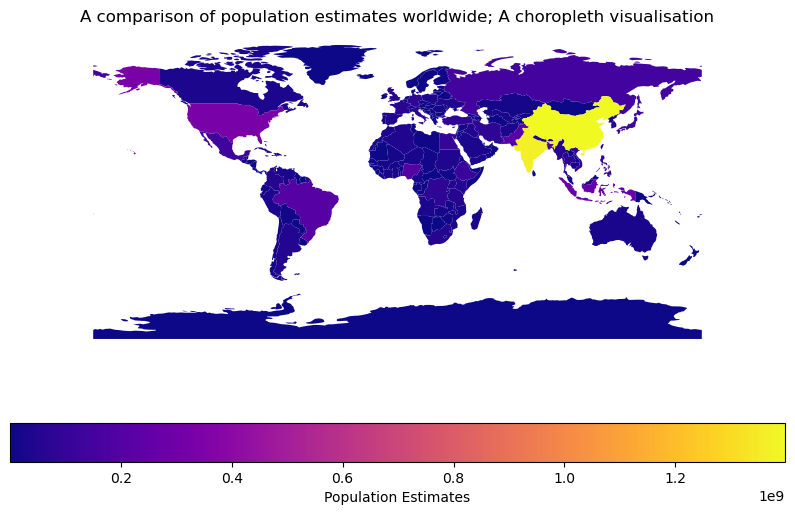

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
world.plot(column='pop_est',
           ax=ax,
           legend=True, 
           legend_kwds={"label": "Population Estimates", "orientation": "horizontal"},
           cmap='plasma',
          )
ax.set_axis_off()
ax.set_title('A comparison of population estimates worldwide; A choropleth visualisation')



In [124]:

#Anotating map did not work, tried all below 

#df_country = world['name']

#for k, v in df_country.iterrows():
   # ax.annotate(k,v)

#df_country = world['name']
#df_country.apply(lambda x: ax.annotate(text=df_country, xy=x.geometry.centroid[0], ha='center', size=7))

C:\Users\mcant\AppData\Local\Temp\ipykernel_30916\1507097956.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
C:\Users\mcant\AppData\Local\Temp\ipykernel_30916\1507097956.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = group.geometry.centroid.iloc[0]


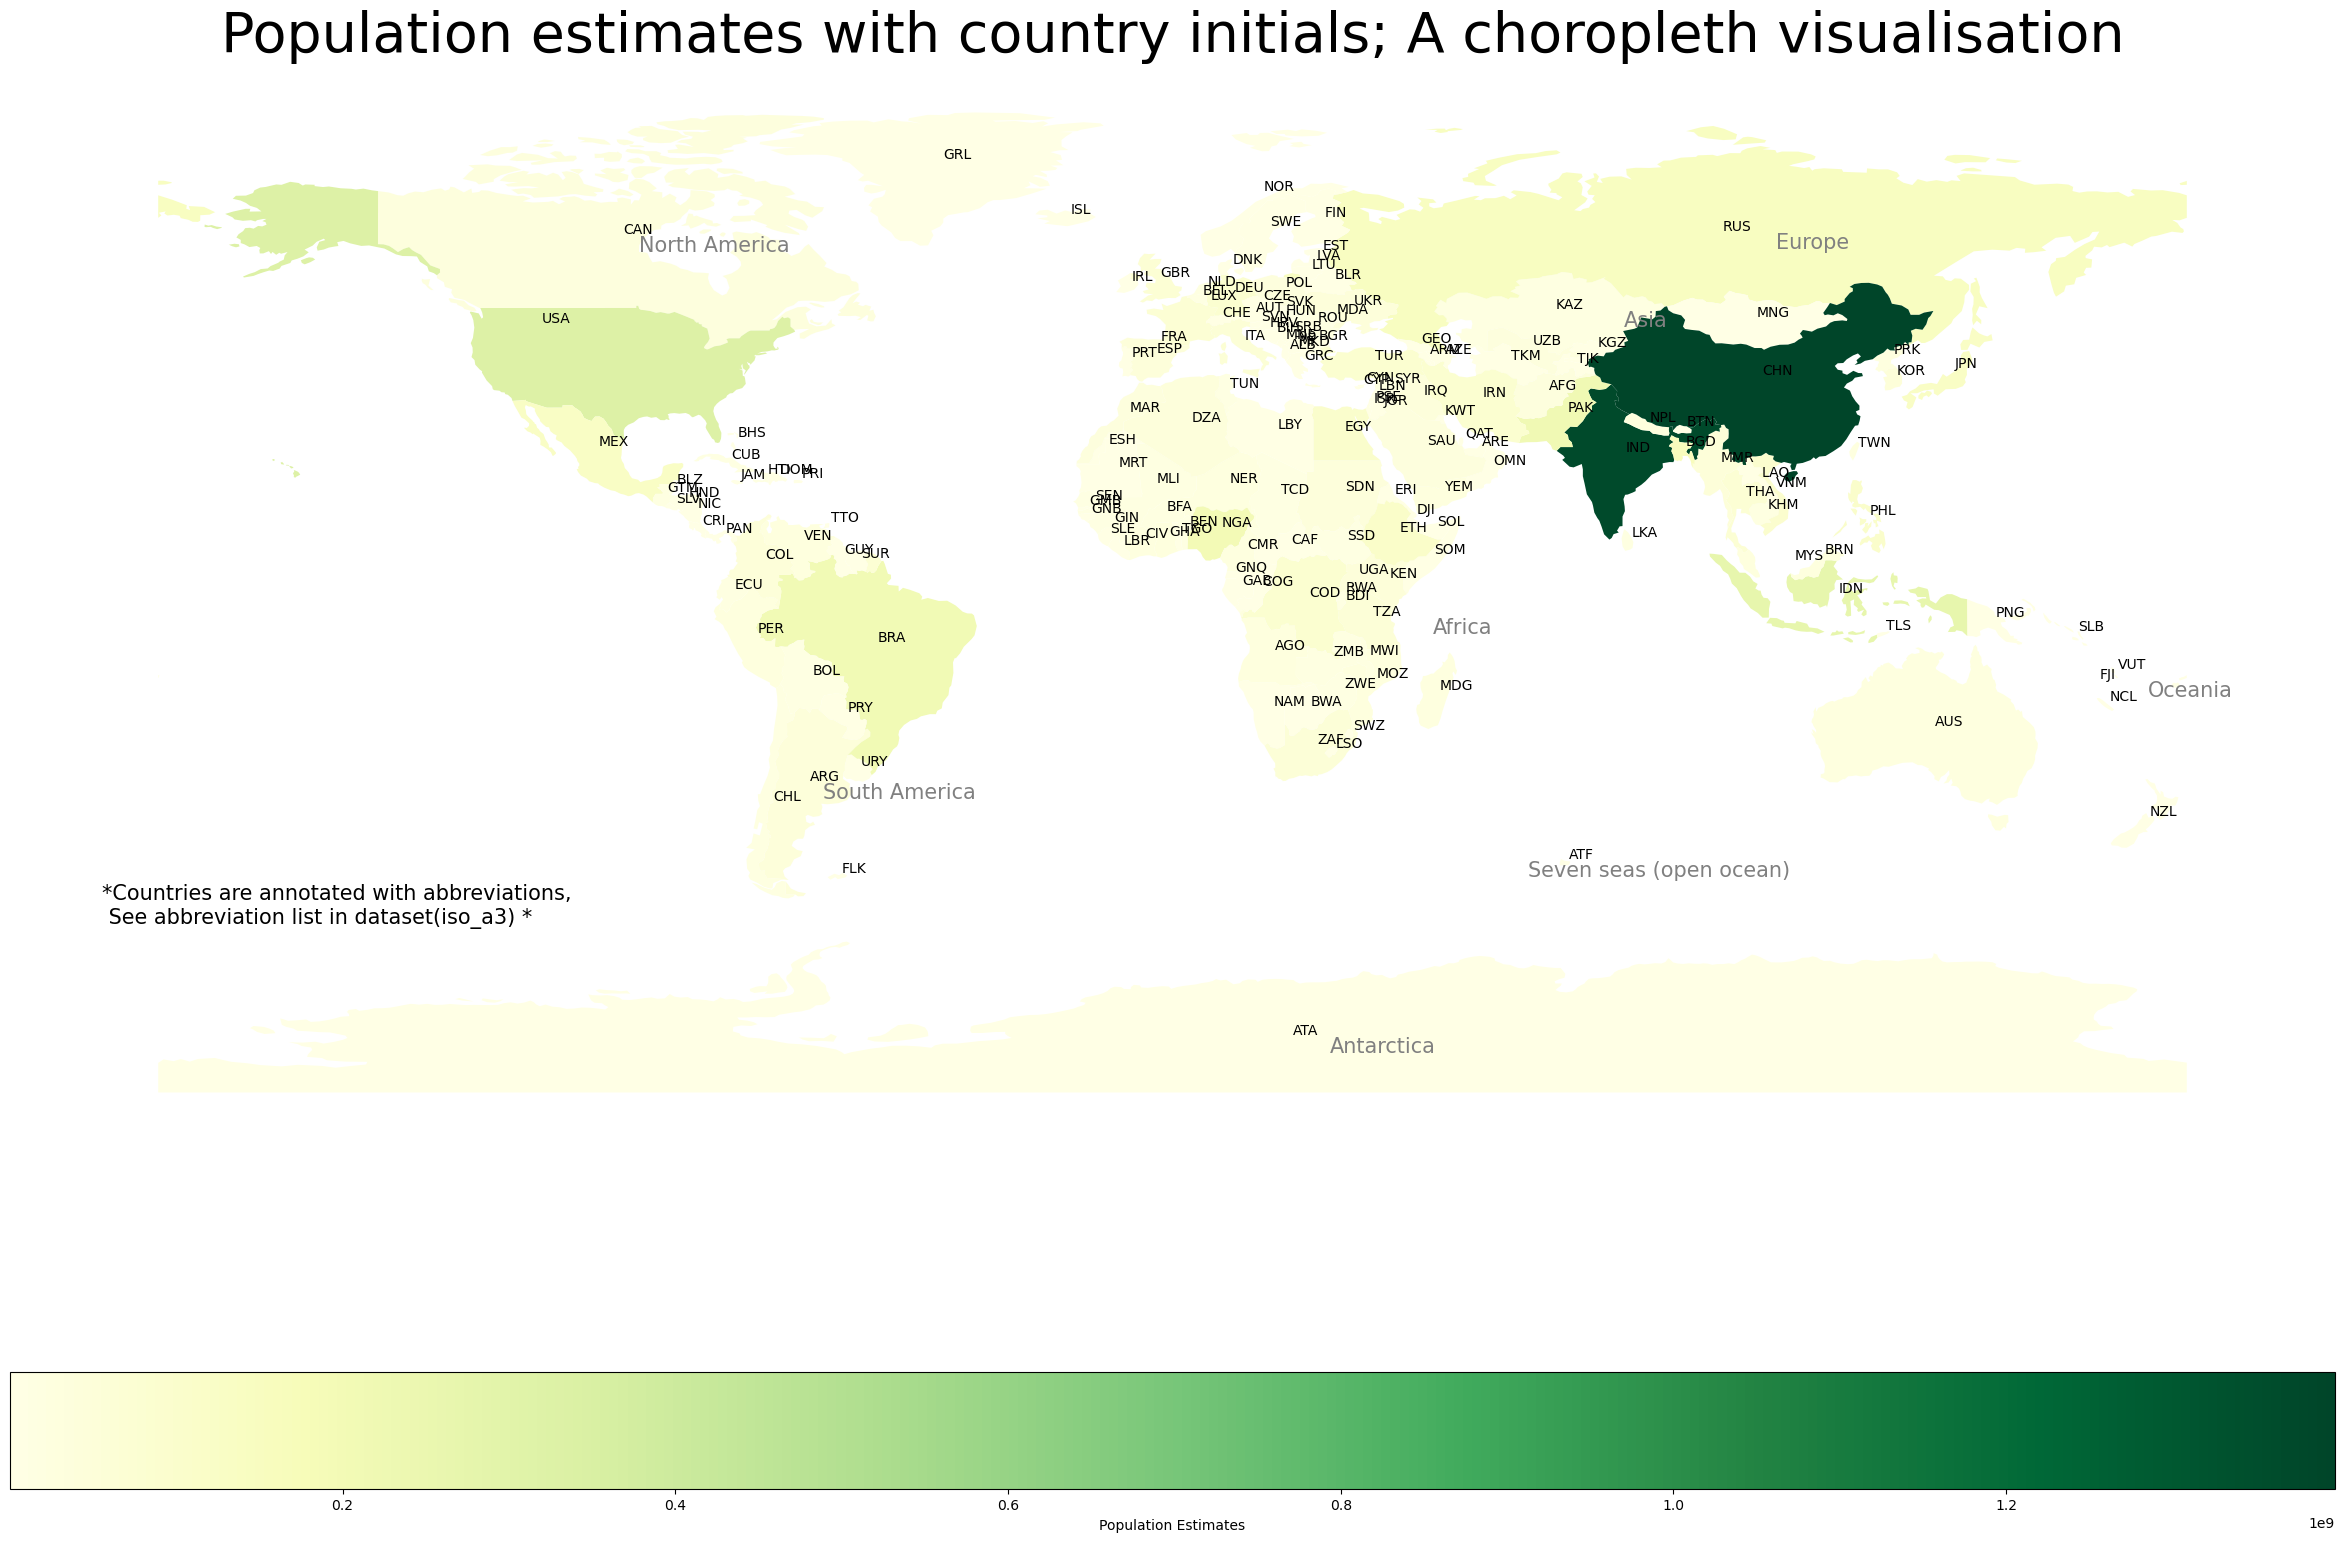

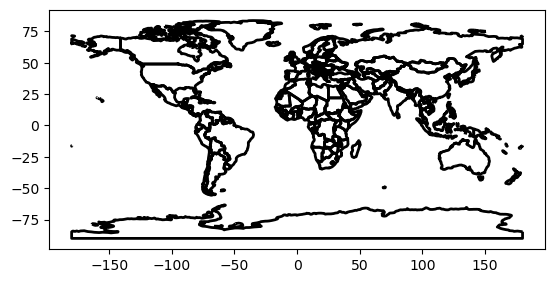

In [2]:
# load dataset
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
# Plot choropleth map 
fig, ax = plt.subplots(1,1,figsize=(30,20))
world.plot(column='pop_est',
           ax=ax,
           legend=True, 
           legend_kwds={"label": "Population Estimates", "orientation": "horizontal"},
           cmap='YlGn',
          )
world.boundary.plot(linewidth=2, color='black')
# set titles
ax.set_axis_off()
ax.text(-190,-60, '*Countries are annotated with abbreviations,\n See abbreviation list in dataset(iso_a3) *', fontsize=15)
ax.set_title('Population estimates with country initials; A choropleth visualisation', fontsize=40)
# Loop through all the items in the 'iso_a3' column, which holds country abbreviations and displays them on their respective countries 

for country, row in world.iterrows(): 
    ax.annotate(text=row['iso_a3'], 
              xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
              xytext=(3, 3), textcoords='offset points', fontsize=10, color='black')       

# Loop to annotate continents 
for continent, group in world.groupby('continent'):
    centroid = group.geometry.centroid.iloc[0]
    ax.annotate(text=continent, xy=(centroid.x, centroid.y), xytext=(68, -10),
                textcoords="offset points", fontsize=15, color='Grey', ha='center')
plt.show()


C:\Users\mcant\AppData\Local\Temp\ipykernel_2464\2551069337.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = group.geometry.centroid.iloc[0]


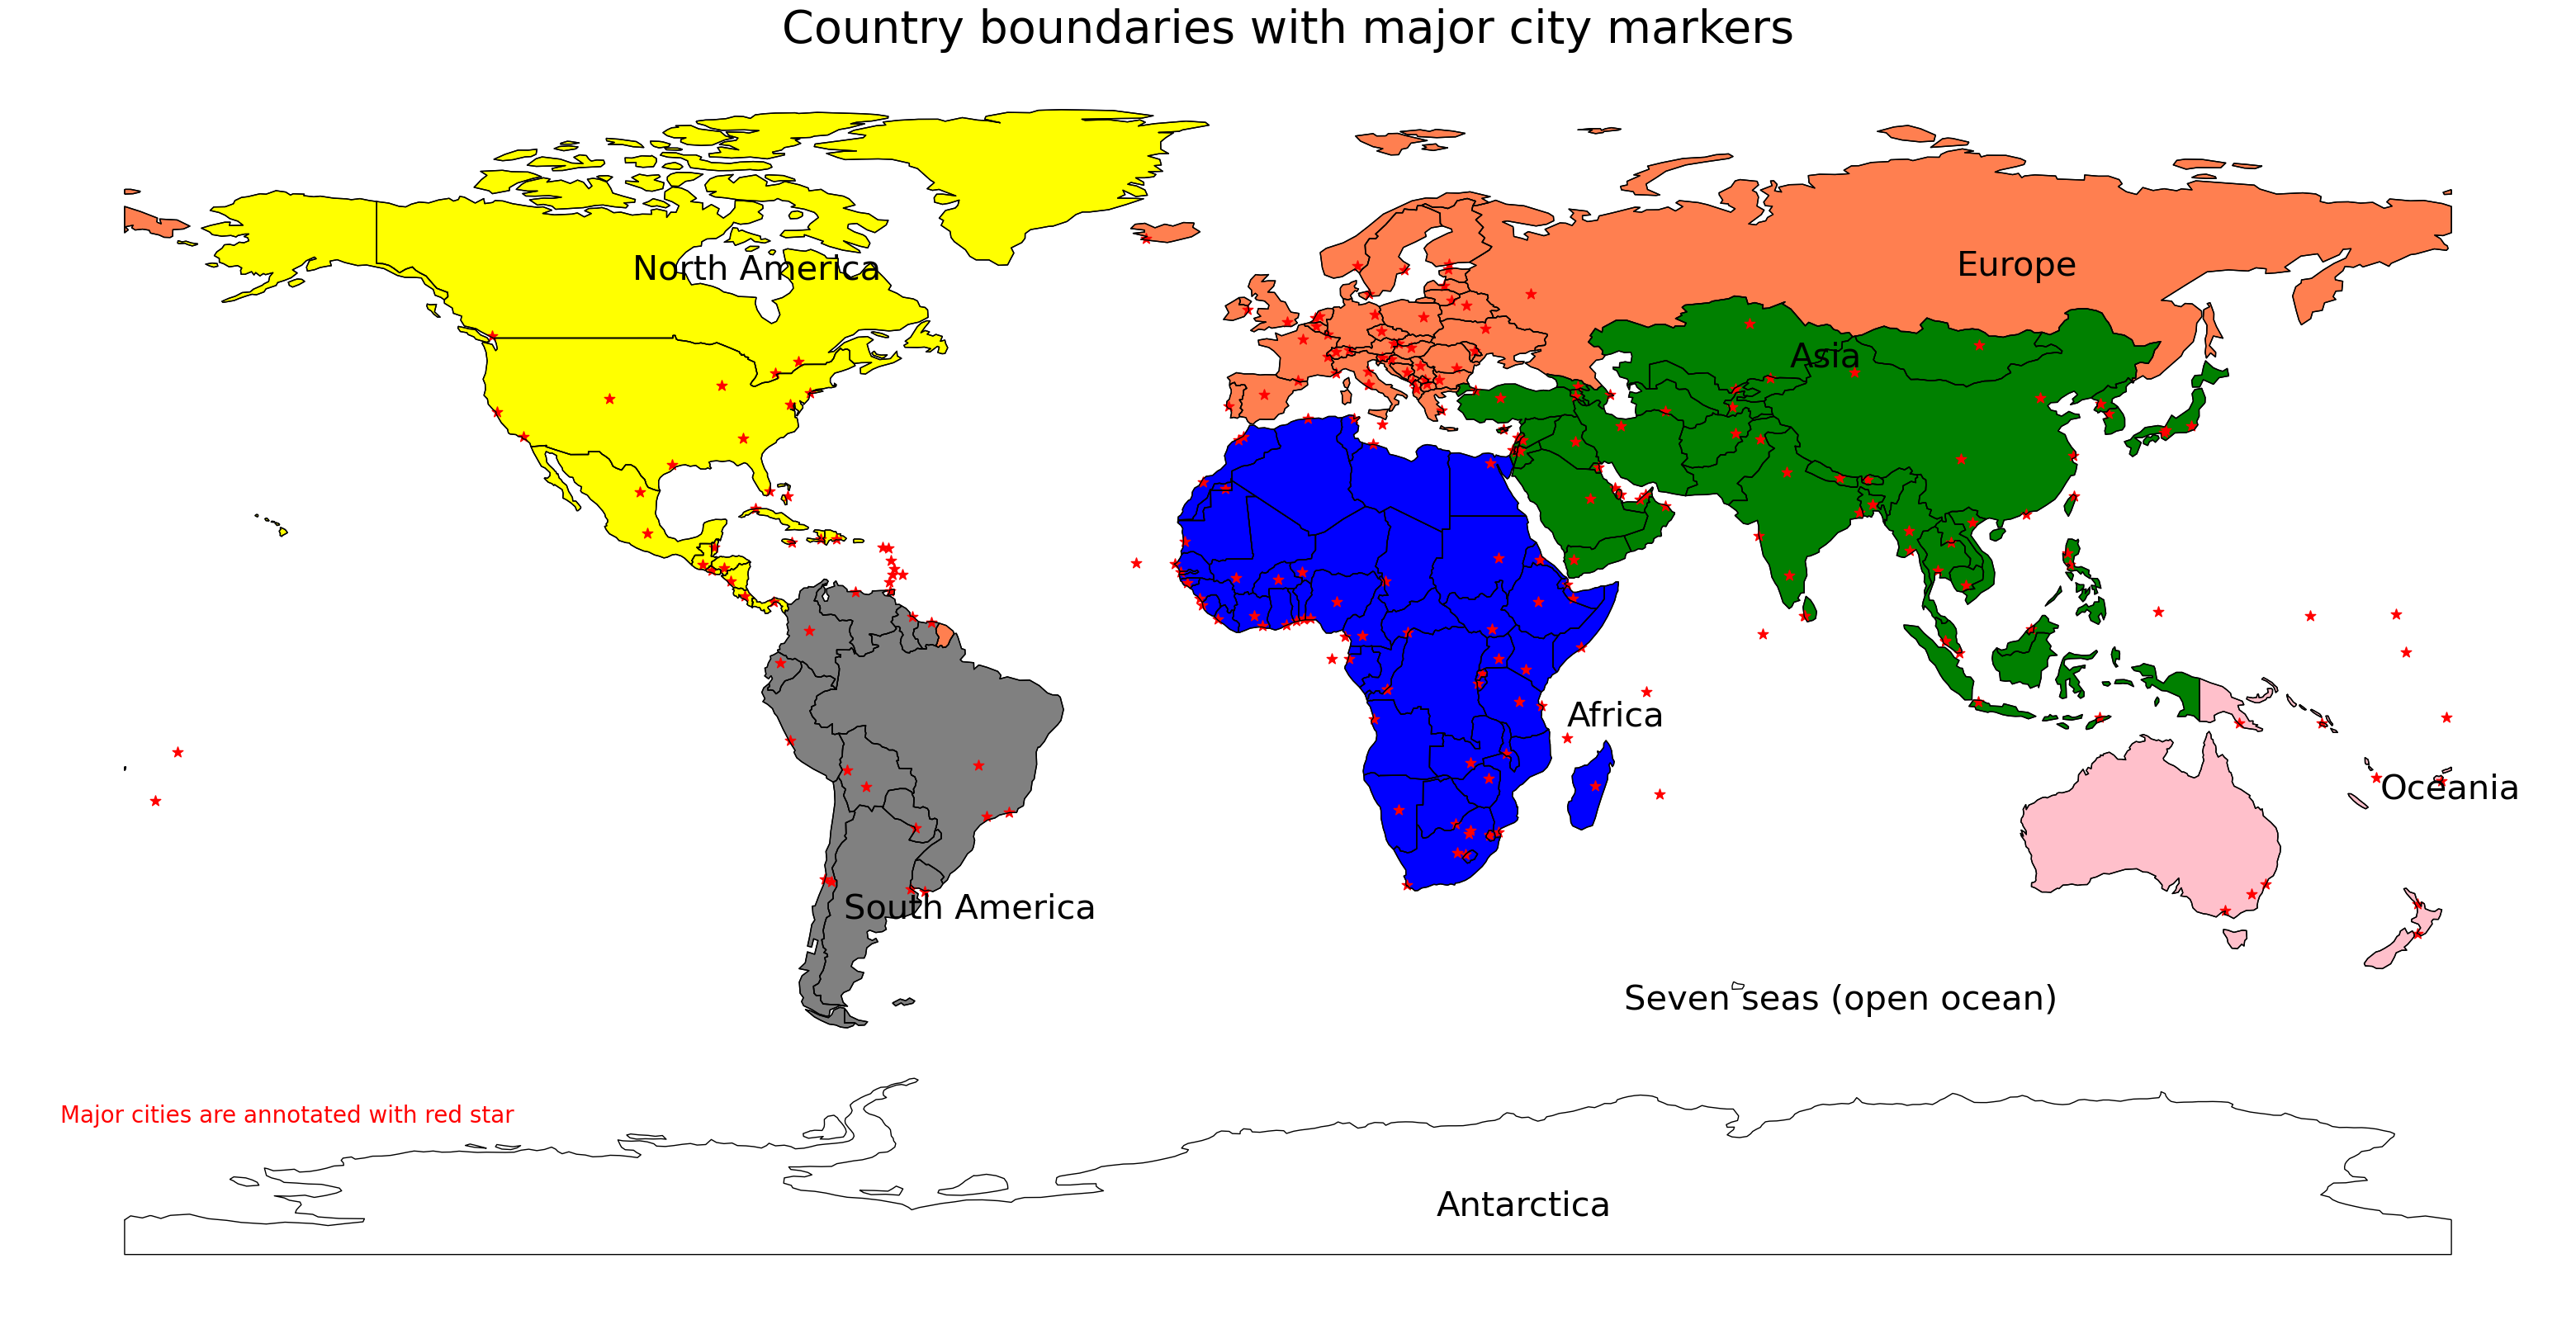

"fig, ax = plt.subplots(1,1,figsize=(30,20))\nworld.plot(color='white', edgecolor='red', ax=ax)\ncities.plot(ax=ax, marker='*', markersize=20)\nax.set_axis_off()\nax.set_title('Country boundaries with major city markers')\nax.text(-190,-70,'Major cities are annotated with blue star', fontsize=7)"

In [129]:
fig, ax = plt.subplots(figsize=(40, 30))

# Plotting the world map with administrative country boundaries 
world.plot(ax=ax, color='white')
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Dictionary to map colours 
colours = {'Africa': 'blue',
          'Asia': 'green', 
          'Europe': 'coral', 
          'North America': 'yellow', 
          'Oceania': 'pink', 
          'South America': 'grey'}
# loop through dictionary ass
for continent, colour in colours.items():
    continent_data = world[world['continent'] == continent]
    continent_data.plot(ax=ax, color=colour, edgecolor='black', label=continent)
cities.plot(ax=ax, marker='*', color='Red' , markersize=90)

for continent, group in world.groupby('continent'):
    centroid = group.geometry.centroid.iloc[0]
    ax.annotate(text=continent, xy=(centroid.x, centroid.y), xytext=(90, -20),
                textcoords="offset points", fontsize=30, color='Black', ha='center')

ax.set_axis_off()
ax.set_title('Country boundaries with major city markers', fontsize=40)
ax.text(-190,-70,'Major cities are annotated with red star', fontsize=20, color='red')
plt.show()


#boundary =

"""fig, ax = plt.subplots(1,1,figsize=(30,20))
world.plot(color='white', edgecolor='red', ax=ax)
cities.plot(ax=ax, marker='*', markersize=20)
ax.set_axis_off()
ax.set_title('Country boundaries with major city markers')
ax.text(-190,-70,'Major cities are annotated with blue star', fontsize=7)"""

C:\Users\mcant\AppData\Local\Temp\ipykernel_28192\2752058166.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = group.geometry.centroid.iloc[0]


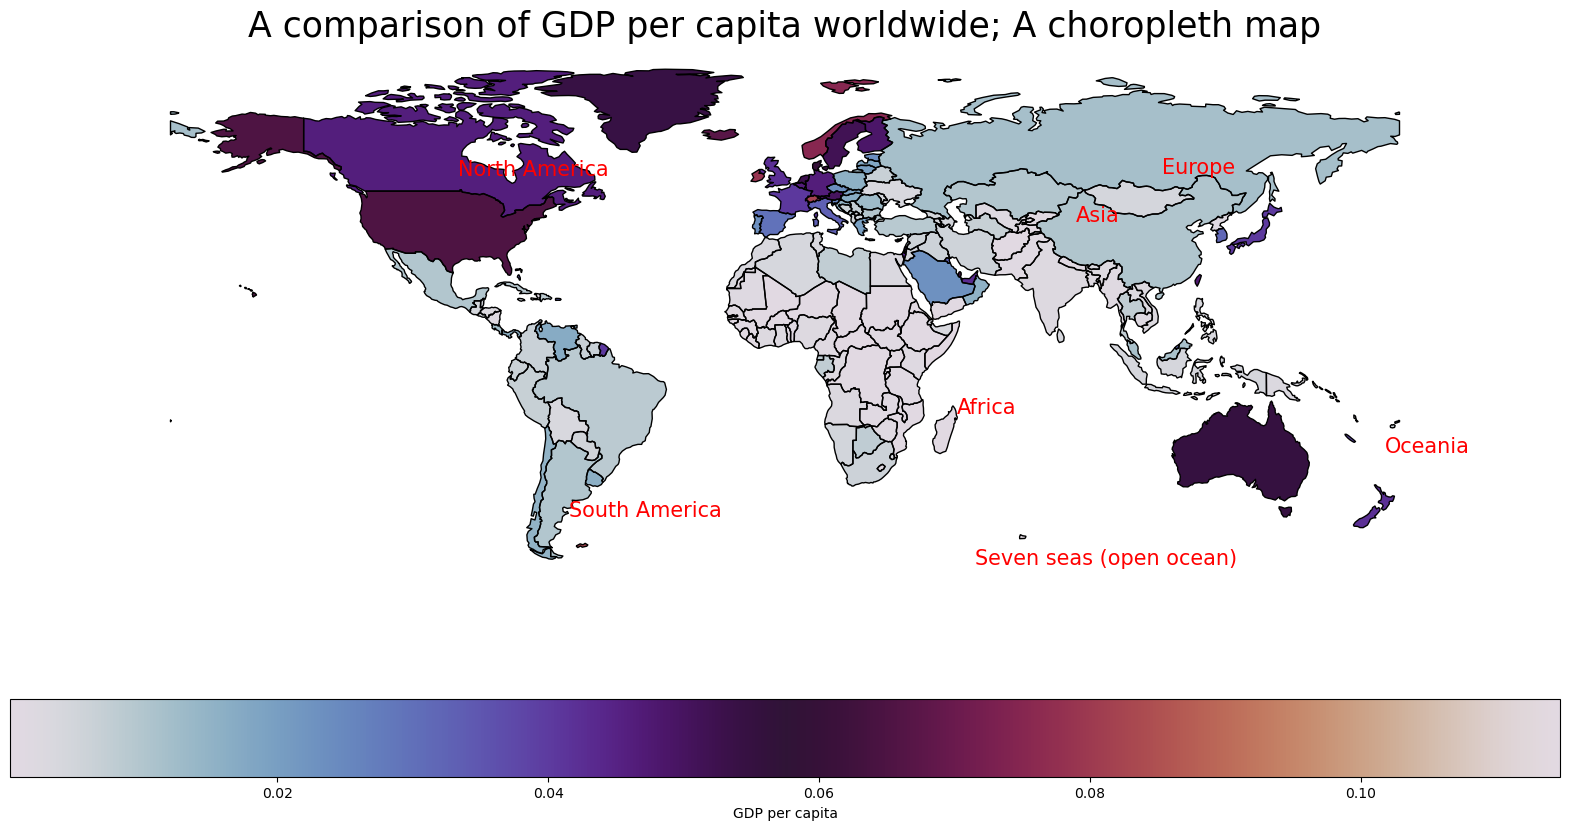

In [27]:
#Remove Antarctica from dataset 
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Get GDP per capita by dividing GDP by pop
world['gdp_per_capita'] = world.gdp_md_est / world.pop_est

fig, ax = plt.subplots(1,1,figsize=(20,10))
world.plot(column='gdp_per_capita',
           ax=ax,
           legend={True},
           legend_kwds={"label": "GDP per capita", "orientation": "horizontal"},
           cmap='twilight',)
ax.set_axis_off()
ax.set_title('A comparison of GDP per capita worldwide; A choropleth map', fontsize=25)
world.boundary.plot(ax=ax, linewidth=1, color='black')
# Loop to annotate continents 
for continent, group in world.groupby('continent'):
    centroid = group.geometry.centroid.iloc[0]
    ax.annotate(text=continent, xy=(centroid.x, centroid.y), xytext=(60, -20),
                textcoords="offset points", fontsize=15, color='Red', ha='center')

C:\Users\mcant\AppData\Local\Temp\ipykernel_28192\131133874.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = group.geometry.centroid.iloc[0]


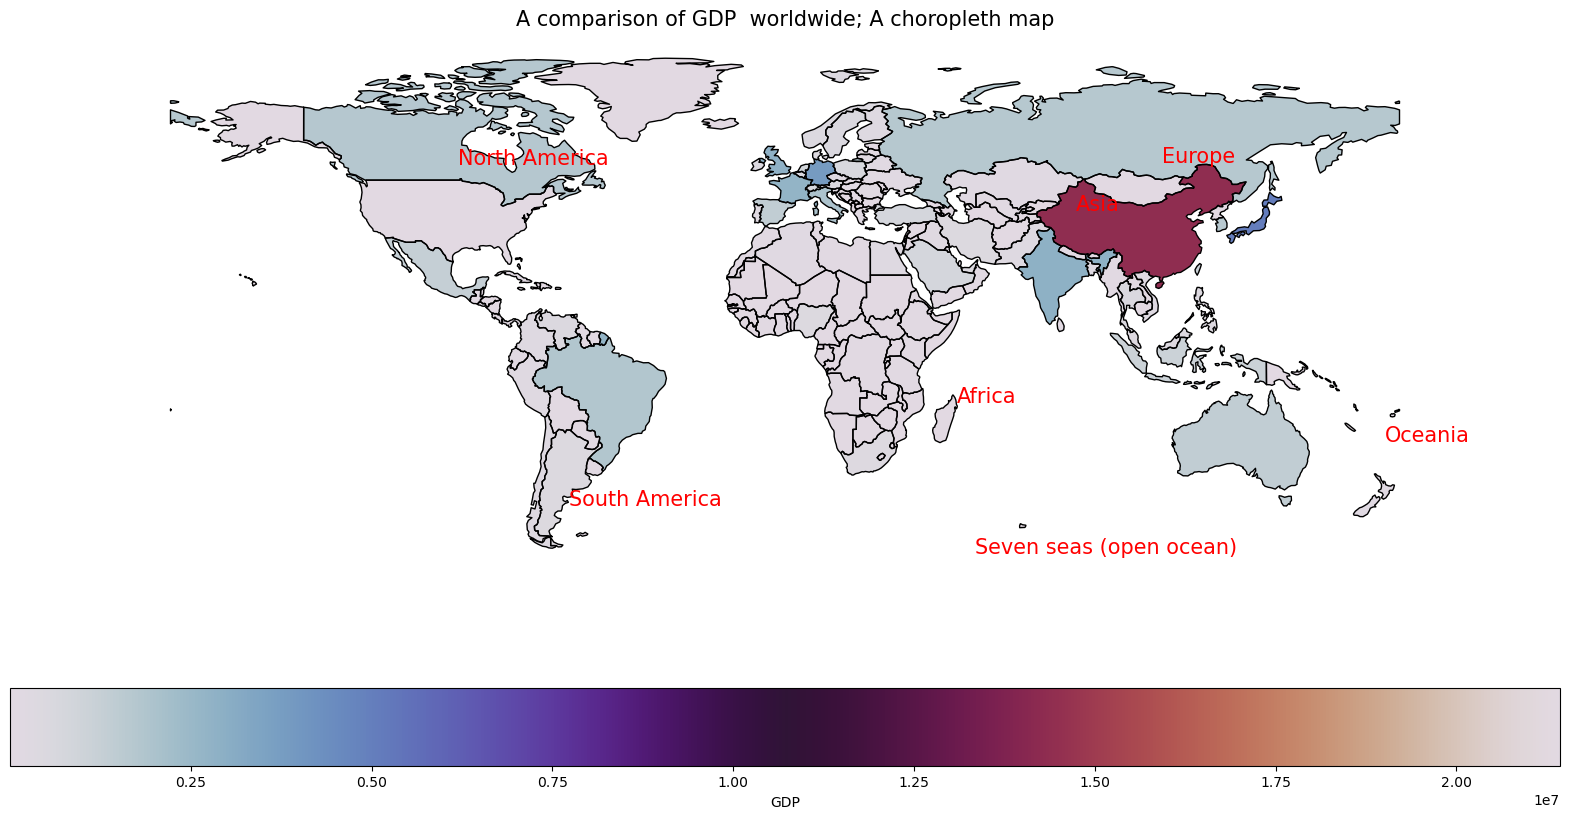

In [31]:
#Remove Antarctica from dataset 
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

fig, ax = plt.subplots(1,1,figsize=(20,10))
world.plot(column='gdp_md_est',
           ax=ax,
           legend=True, 
           legend_kwds={"label": "GDP", "orientation": "horizontal"},
           cmap='twilight',)
ax.set_axis_off()
ax.set_title('A comparison of GDP  worldwide; A choropleth map', fontsize=15)
world.boundary.plot(ax=ax, linewidth=1, color='black')
 

# Loop to annotate continents 
for continent, group in world.groupby('continent'):
    centroid = group.geometry.centroid.iloc[0]
    ax.annotate(text=continent, xy=(centroid.x, centroid.y), xytext=(60, -20),
                textcoords="offset points", fontsize=15, color='Red', ha='center')

C:\Users\mcant\AppData\Local\Temp\ipykernel_2464\1366647578.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\mcant\AppData\Local\Temp\ipykernel_2464\1366647578.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
C:\Users\mcant\AppData\Local\Temp\ipykernel_2464\1366647578.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


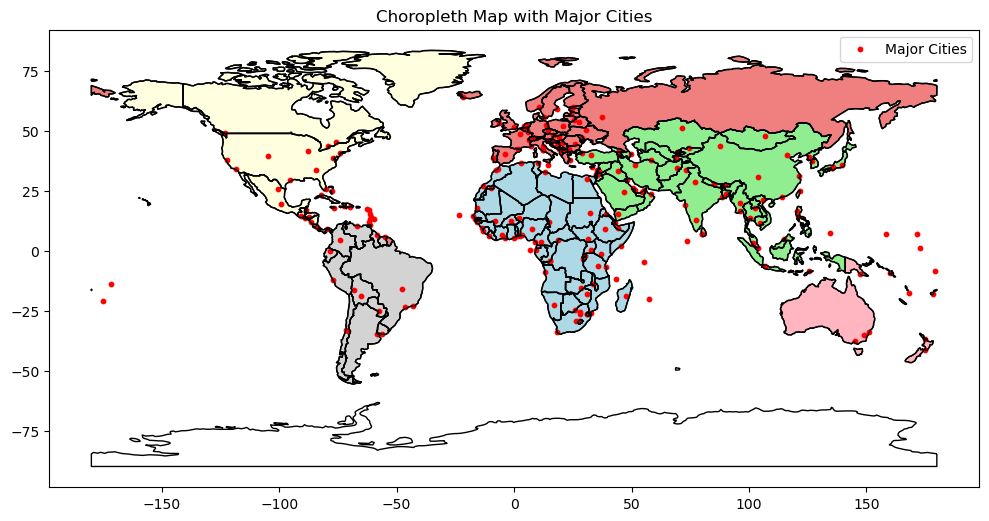

In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load major cities dataset (example: using GeoPandas built-in dataset)
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Merge the datasets based on the 'continent' column

# Create a color map for continents
colors = {'Africa': 'lightblue', 'Asia': 'lightgreen', 'Europe': 'lightcoral', 'North America': 'lightyellow', 'Oceania': 'lightpink', 'South America': 'lightgrey'}

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')

for continent, color in colors.items():
    continent_data = world[world['continent'] == continent]
    continent_data.plot(ax=ax, color=color, edgecolor='black', label=continent)

# Plot major cities on the map
cities.plot(ax=ax, marker='o', color='red', markersize=10, label='Major Cities')

# Annotate city names for better visibility (optional)

# Set plot title and show the map
plt.title('Choropleth Map with Major Cities')
plt.legend()
plt.show()